In [14]:
import rasterio
import rasterio.plot
import numpy as np
from rasterio.plot import show, show_hist
from rasterio import mask
from glob import glob
import os

import matplotlib.pyplot as plt
import osmnx as ox

# Aggregate all monthly rasters of wind and temperature to a single file

In [16]:
data_dir = '../data/wc2.0_30s_tavg' 
file_list = glob(os.path.join(data_dir, '*.tif'))
file_list

['../data/wc2.0_30s_tavg/avg_ta.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_08.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_09.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_07.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_06.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_12.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_04.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_10.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_11.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_05.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_01.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_02.tif',
 '../data/wc2.0_30s_tavg/wc2.0_30s_tavg_03.tif']

In [233]:
def read_file(file):
    with rasterio.open(file) as src:
        return(src.read(1))

# Read all data as a list of numpy arrays 
array_list = [read_file(x) for x in file_list]
# Perform averaging
array_out = np.mean(array_list, axis=0)
array_out

/anaconda3/envs/OSMNX/lib/python3.6/site-packages/numpy/core/_methods.py:75: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


array([[      -inf,       -inf,       -inf, ...,       -inf,       -inf,
              -inf],
       [      -inf,       -inf,       -inf, ...,       -inf,       -inf,
              -inf],
       [      -inf,       -inf,       -inf, ...,       -inf,       -inf,
              -inf],
       ...,
       [-33.833336, -44.44167 , -44.44167 , ..., -41.350002, -30.708334,
        -30.699999],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [234]:
array_out.shape

(21600, 43200)

In [235]:
# Get metadata from one of the input files
with rasterio.open(file_list[0]) as src:
    meta = src.meta

meta.update(dtype=rasterio.float32)

# Write output file
with rasterio.open('data/wc2.0_30s_tavg/avg_tavg.tif', 'w', **meta) as dst:
    dst.write(array_out.astype(rasterio.float32), 1)

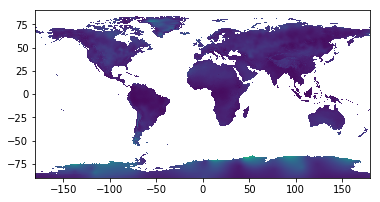

In [230]:
raster = rasterio.open('data/wc2.0_30s_wind/avg_wind.tif')
show(raster);

# Create raster visualization for California subset

In [4]:
places = ['California, USA']

California = ox.gdf_from_places(places)

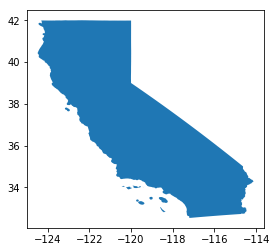

In [6]:
California.plot();

In [8]:
filepath = '../data/wc2.0_30s_wind/wc2.0_30s_wind_06.tif'

with rasterio.open('../data/wc2.0_30s_wind/wc2.0_30s_wind_06.tif') as src:
    print(src.profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4e+38, 'width': 43200, 'height': 21600, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': Affine(0.008333333333333333, 0.0, -180.0,
       0.0, -0.008333333333333333, 90.0), 'tiled': False, 'compress': 'deflate', 'interleave': 'band'}


In [9]:
with rasterio.open(filepath) as src:
    out_image, out_transform = mask.mask(src, California.geometry,
                                                        crop=True)
    out_meta = src.meta.copy()

In [10]:
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
with rasterio.open("RGB.byte.masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [11]:
with rasterio.open('RGB.byte.masked.tif') as src:
    wind_raster = src.read()

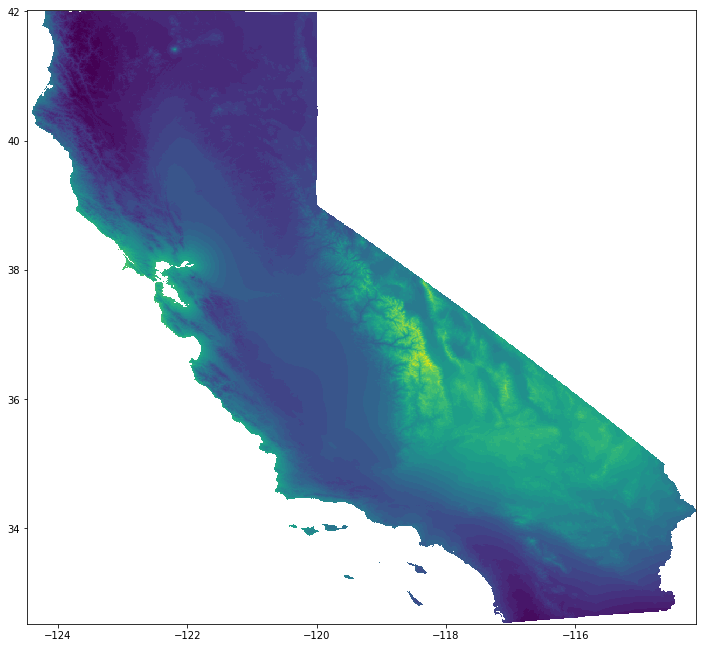

<Figure size 432x288 with 0 Axes>

In [13]:
raster = rasterio.open('RGB.byte.masked.tif')
fig = plt.figure(figsize=(12,12))
show(raster);
plt.savefig('CA_raster_wind.png', format='png', dpi=300);